In [2]:
import os
import importlib

import pandas as pd

import tensorflow.keras as keras



import dsci592.model as model

In [2]:
pd.set_option("display.max_columns", None)

In [9]:
importlib.reload(model)

<module 'dsci592.model' from '/home/noah/projects/drexel/dsci592/DS-capstone-pt1/code/src/dsci592/model.py'>

In [4]:
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

In [5]:
golden_dataset_file_name = os.path.join('/', 'data', 'projects', 'drexel', 'dsci592', 'feeFiFoFum.pkl')
df = model.load_dataset(golden_dataset_file_name)

2022-02-24 20:40:58.382479: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 20:40:58.382720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 20:40:58.432209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 20:40:58.432448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-24 20:40:58.432649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [6]:
df = df.drop(columns='hoursWorkedMean')

In [7]:
df.columns

Index(['fips', 'JHU_ConfirmedCases.data', 'JHU_ConfirmedDeaths.data',
       'cyclical_sin', 'cyclical_cos', 'continuous_sin', 'continuous_cos',
       'geo0', 'geo1', 'geo2',
       ...
       'healthInsTotal', 'healthInsNativeWith', 'healthInsForeignNatWith',
       'healthInsForeignNoncitWith', 'healthInsForeignNatNo',
       'healthInsForeignNoncitNo', 'healthInsNativeNo', 'pm25', 'latitude',
       'longitude'],
      dtype='object', length=101)

In [11]:
# If data has not already been prepared, execute the following
# Important:  Delete *.npy files from data directory and delete all files in eval, test, and train first

# 7 steps
model.prepare_data(df, days_to_predict=7, output_path='./data/tmp')
model.train_test_eval_split(train='./data/train7', test='./data/test7', eval_='./data/eval7', source='./data/tmp')

# 1 step
# model.prepare_data(df, days_to_predict=1, output_path='./data/tmp')
# model.train_test_eval_split(train='./data/train', test='./data/test', eval_='./data/eval', source='./data/tmp')

0.100.200.300.400.500.600.700.800.900.1000.1100.1200.1300.1400.1500.1600.1700.1800.1900.2000.2100.2200.2300.2400.2500.2600.2700.2800.2900.3000.

In [ ]:
train_ds, val_ds, test_ds = model.get_train_test_eval_ds(train='./data/train/x_*.npy', test='./data/test/x_*.npy', eval_='./data/eval/x_*.npy', days_to_predict=1)
# train_ds, val_ds, test_ds = model.get_train_test_eval_ds()

In [ ]:
train_ds, val_ds, test_ds = model.get_train_test_eval_ds()

In [ ]:
i = 0
for x,y in train_ds:
    print(x.shape, y.shape)
    i += 1
    if i > 10: break

In [ ]:
import numpy as np
train_ds, val_ds, test_ds = model.get_train_test_eval_ds()
for x,y in train_ds:
    if np.any(np.isnan(x)):
        print(x, y)
        break

In [ ]:
import numpy as np
train_ds, val_ds, test_ds = model.get_train_test_eval_ds()
for xs,ys in train_ds:
    for x,y in zip(xs, ys):
        if np.any(np.isnan(x)):
            print(x, y)
            break

In [14]:
df = df.drop(columns='hoursWorkedMean')

KeyError: "['hoursWorkedMean'] not found in axis"

In [13]:
df.shape

(1879589, 101)

In [15]:
train_ds, val_ds, test_ds = model.get_train_test_eval_ds()

In [16]:
df.columns

Index(['fips', 'JHU_ConfirmedCases.data', 'JHU_ConfirmedDeaths.data',
       'cyclical_sin', 'cyclical_cos', 'continuous_sin', 'continuous_cos',
       'geo0', 'geo1', 'geo2',
       ...
       'healthInsTotal', 'healthInsNativeWith', 'healthInsForeignNatWith',
       'healthInsForeignNoncitWith', 'healthInsForeignNatNo',
       'healthInsForeignNoncitNo', 'healthInsNativeNo', 'pm25', 'latitude',
       'longitude'],
      dtype='object', length=101)

In [17]:
len(set(df.fips))

3083

In [23]:
sizes = set()
for fip in df.fips:
    size = df[df.fips==fip].shape[0]
    if size not in sizes:
        sizes.add(size)
        print(size)
print(sizes)

623
620
622
625
606
619
617
630
611
631
624
492
607
609
629
594
615
621
596
612
595
598
540
627
626
613
628
610
535
614
600
616
589
605
618
597
608
484
592
576
603
602
541
604
539
512
545
520
601
599
530
504
433
531
525
577
435
549
580
579
476
553
583
478
513
518
584
517
588
593
434
591
590
582
499
495
524
537
538
546
448
573
501
508
566
506
534
548
503
550
568
533
529
569
384
510
507
581
516
586
514
587
442
558
562
585
547
521
424
564
578
523
498
554
415
544
526
472
509
469
380
500
567
528
493
423
574
560
497
491
485
565
543
465
519
559
561
502
563
505
527
556
571
532
486
417
92
{512, 513, 514, 516, 517, 518, 519, 520, 521, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 537, 538, 539, 540, 541, 543, 544, 545, 546, 547, 548, 549, 550, 553, 554, 556, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 571, 573, 574, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 60

In [24]:
min(sizes), max(sizes)

(92, 631)

In [5]:
# Complex model

input = keras.layers.Input(shape=(30,100), name='Input')
lstm1 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-1')(input)
dropout1 = keras.layers.Dropout(0.20, name='Dropout-1')(lstm1)
lstm2 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-2')(dropout1)
dropout2 = keras.layers.Dropout(0.20, name='Dropout-2')(lstm2)
lstm3 = keras.layers.LSTM(256, return_sequences=True, name='LSTM-3')(dropout2)
# output = keras.layers.TimeDistributed(keras.layers.Dense(1, name='Output'))(lstm3)
output = keras.layers.Dense(1, name='Output')(lstm3)
model = keras.models.Model(inputs=input, outputs=output, name='Covid-Prediction-30-1')

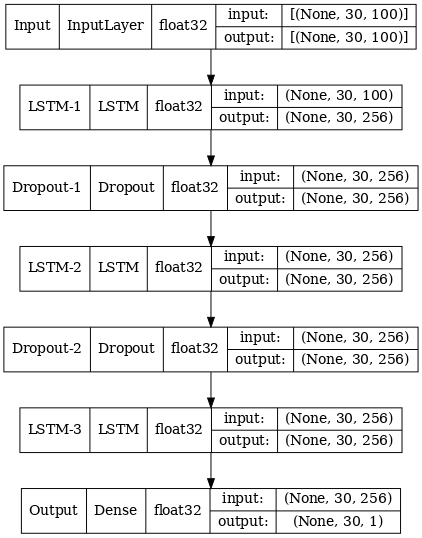

In [6]:
keras.utils.plot_model(model, to_file='model_3_256_detailed.png', show_shapes=True, show_dtype=True, 
                       show_layer_activations=False, rankdir='TB', dpi=70)